<a href="https://colab.research.google.com/github/Rishit003/BDCE-ML-Task-1/blob/main/BDCE_ML_Task_1_Rishit_Singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Task - 1**
---
## **By Rishit Singh - 2313103**
---

## **1. Importing the data set**

Importing the pandas, numpy, seaborn and matplotlib packages

In [69]:
import pandas
import numpy
import seaborn
import matplotlib

Importing the csv file as data

In [70]:
data = pandas.read_csv("user_behavior_dataset_task1.csv")

---

## **2. Initial impressions of the given data set**

##### **Viewing some data to get a gist of the given dataframe**

In [74]:
print(data.head())
print(data.tail())

   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                     393.0   
1        2       OnePlus 9          Android                     268.0   
2        3    Xiaomi Mi 11          Android                     154.0   
3        4  Google Pixel 5          Android                     239.0   
4        5       iPhone 12              iOS                     187.0   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                   1872.0   
1                         4.7                   1331.0   
2                         4.0                    761.0   
3                         4.8                   1676.0   
4                         4.3                   1367.0   

   Number of Apps Installed  Data Usage (MB/day)   Age  Gender  \
0                      67.0               1122.0  40.0    Male   
1                      42.0                944.0  47.0  Female   
2             

##### **Describing the data using the describe command**

In [75]:
print(data.describe())

          User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
count  700.000000                692.000000                  689.000000   
mean   342.877143                274.768786                    5.329753   
std    204.528990                177.617612                    3.062285   
min      1.000000                 30.000000                    1.000000   
25%    168.750000                116.000000                    2.600000   
50%    339.500000                230.000000                    5.000000   
75%    512.250000                441.250000                    7.400000   
max    700.000000                598.000000                   12.000000   

       Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
count               688.000000                687.000000           693.000000   
mean               1540.902616                 51.305677           946.936508   
std                 816.770905                 26.825584           645.134548   


##### **Pandas command to print out the number of unique values for different data variables.**

In [76]:
data.nunique()

,0
User ID,671
Device Model,5
Operating System,2
App Usage Time (min/day),380
Screen On Time (hours/day),107
Battery Drain (mAh/day),596
Number of Apps Installed,86
Data Usage (MB/day),560
Age,42
Gender,2


##### **Conclusion** - We can conclude from above that our data set contains behaviour of smartphone users accross 5 different smartphone models. Each user is assigned a behaviour class from 1-5 depending upon some behaviour pattern.

## **3. Cleaning the data set**

##### **Removing null values**

Checking for null values

In [77]:
data.isnull().sum()

,0
User ID,0
Device Model,2
Operating System,0
App Usage Time (min/day),8
Screen On Time (hours/day),11
Battery Drain (mAh/day),12
Number of Apps Installed,13
Data Usage (MB/day),7
Age,10
Gender,0


Checking how many user entries are containg null values.

In [78]:
clean_data = data.dropna(axis = 0)

In [79]:
clean_data.nunique()

,0
User ID,615
Device Model,5
Operating System,2
App Usage Time (min/day),361
Screen On Time (hours/day),107
Battery Drain (mAh/day),563
Number of Apps Installed,86
Data Usage (MB/day),525
Age,42
Gender,2


We can see that there are 56 user entries which has  null values. Since the number is pretty low, it will not effect our analysis when dropped.

In [80]:
data=clean_data

##### **Removing Duplicate Values**

Checking for duplicate values

In [81]:
dupl=data.duplicated().sum()

There are 25 duplicate values present in our data frame.

Dropping duplicate data

In [97]:
data=data.drop_duplicates()

## **4. Visualising the data set**

#### **1. Correlational Matrix**

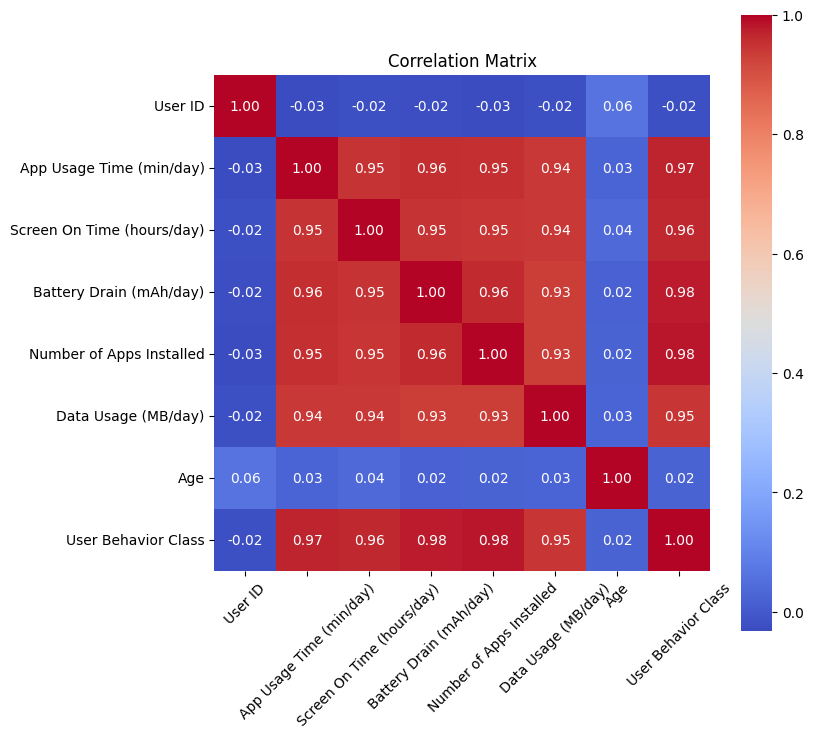

In [125]:
correlation=data.corr(numeric_only=True)
matplotlib.pyplot.figure(figsize=(8, 8))
seaborn.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, xticklabels=correlation.columns, yticklabels=correlation.columns)
matplotlib.pyplot.title('Correlation Matrix')
matplotlib.pyplot.xticks(rotation=45)
matplotlib.pyplot.show()

#### **2. Demographic distribution accross the 5 Device Models**

##### **Distribution shown by a Pie Chart**

<Axes: ylabel='count'>

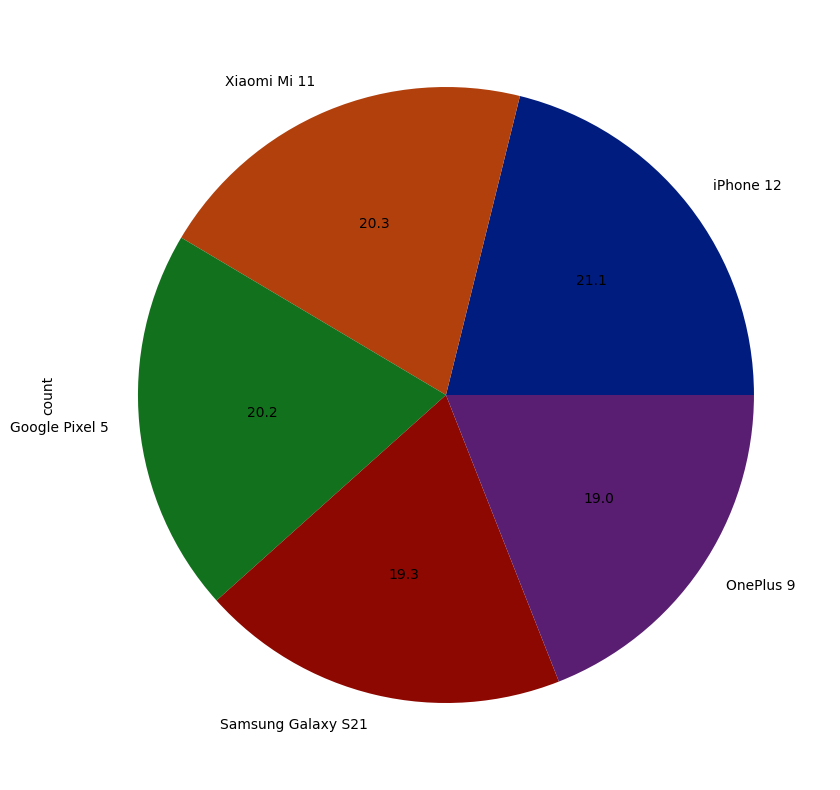

In [99]:
data['Device Model'].value_counts().plot.pie(y=data['Device Model'],figsize=(10,10),autopct='%1.1f',colors=seaborn.color_palette('dark'))

**Conclusion** - The given data set contains almost equally distributed number of users in each device, with iPhone 12 having the largest and Samsung Galaxy S21 having the smallest demographic.

##### **Distribution according to Gender shown by a Bar Graph**

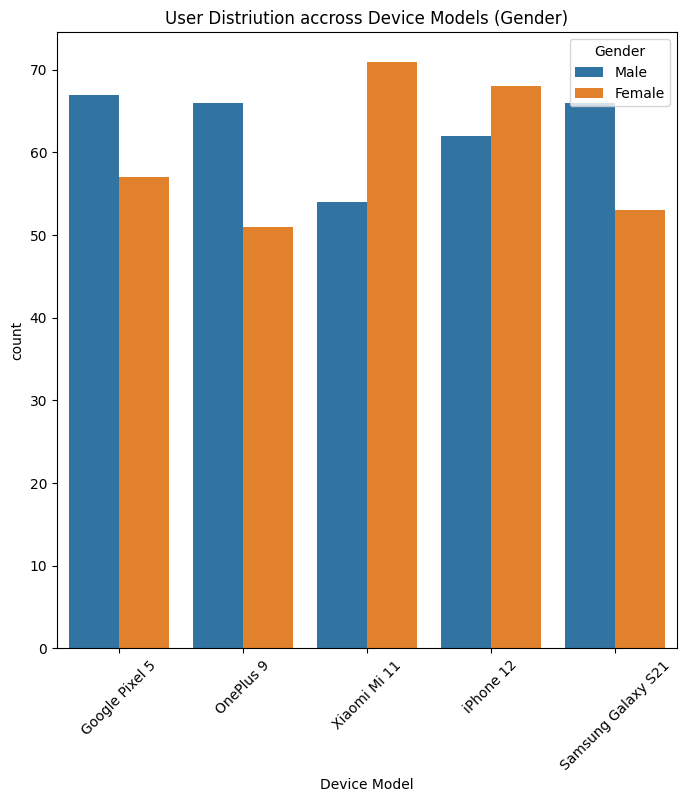

In [100]:
matplotlib.pyplot.figure(figsize=(8, 8))
seaborn.countplot(x='Device Model', data=data, hue='Gender')
matplotlib.pyplot.title('User Distriution accross Device Models (Gender)')
matplotlib.pyplot.xticks(rotation=45)
matplotlib.pyplot.show()

**Conclusion** - The given data set contains almost equally distributed number of users in each device, with Xiaomi Mi 11 and iPhone 12 having a slightly larger demographic in females.

##### **Distribution according to Age shown by a Bar Graph**

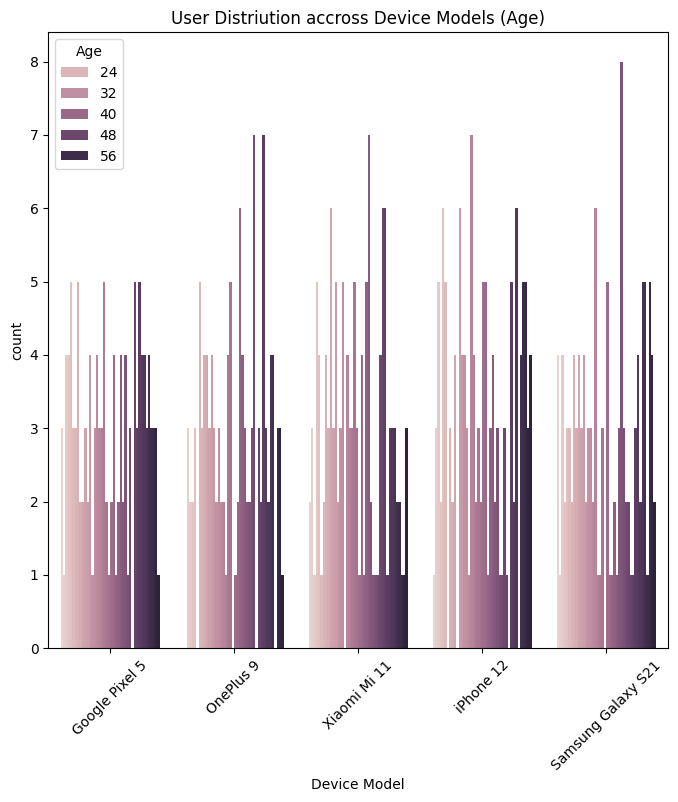

In [101]:
matplotlib.pyplot.figure(figsize=(8, 8))
seaborn.countplot(x='Device Model', data=data, hue='Age')
matplotlib.pyplot.title('User Distriution accross Device Models (Age)')
matplotlib.pyplot.xticks(rotation=45)
matplotlib.pyplot.show()

**Conclusions -**<br>

**1. Google Pixel 5** - has a equally distributed demographic<br>
**2. One Plus 9** - more popular in the middle aged group ranging from 40-48<br>
**3. Xiaomi Mi 11** - most popular in middle aged groups<br>
**4. iPhone 12** - most popular in the younger as well as older age group<br>
**5. Samsung Galaxy S21** - with a slight larger middle aged group


#### **3. Age and Gender Trends (Scatterplot)**

##### **Screen Time**

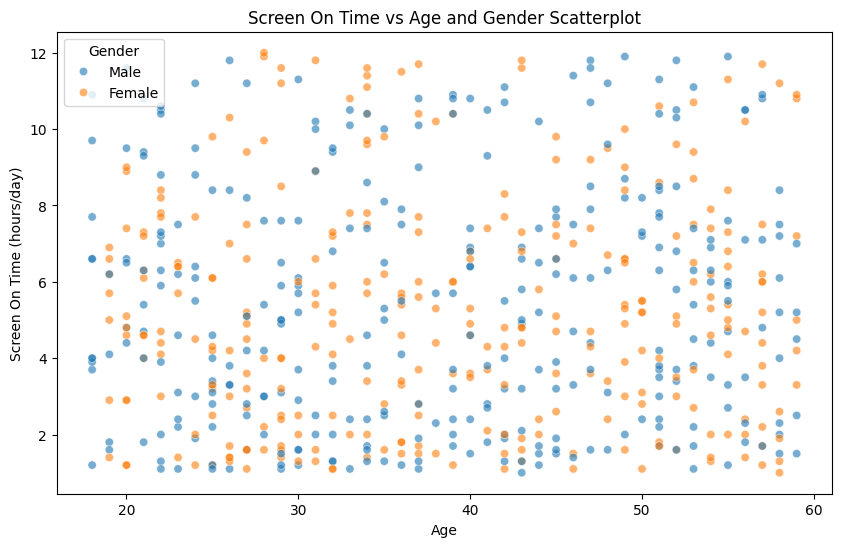

In [102]:
matplotlib.pyplot.figure(figsize=(10, 6))
seaborn.scatterplot(data=data, x='Age', y='Screen On Time (hours/day)',hue='Gender',  alpha=0.6)
matplotlib.pyplot.title('Screen On Time vs Age and Gender Scatterplot')
matplotlib.pyplot.show()

##### **Data Usage**

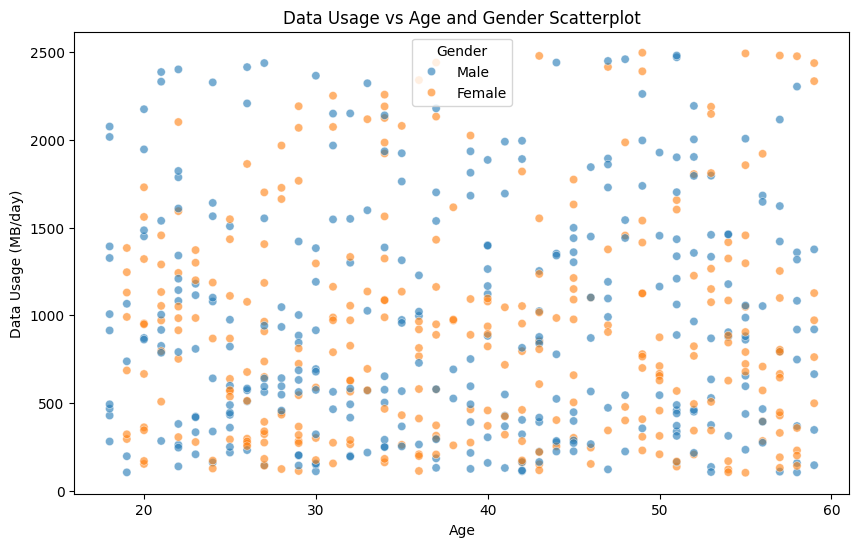

In [103]:
matplotlib.pyplot.figure(figsize=(10, 6))
seaborn.scatterplot(data=data, x='Age', y='Data Usage (MB/day)',hue='Gender',  alpha=0.6)
matplotlib.pyplot.title('Data Usage vs Age and Gender Scatterplot')
matplotlib.pyplot.show()

##### **App Usage Time**

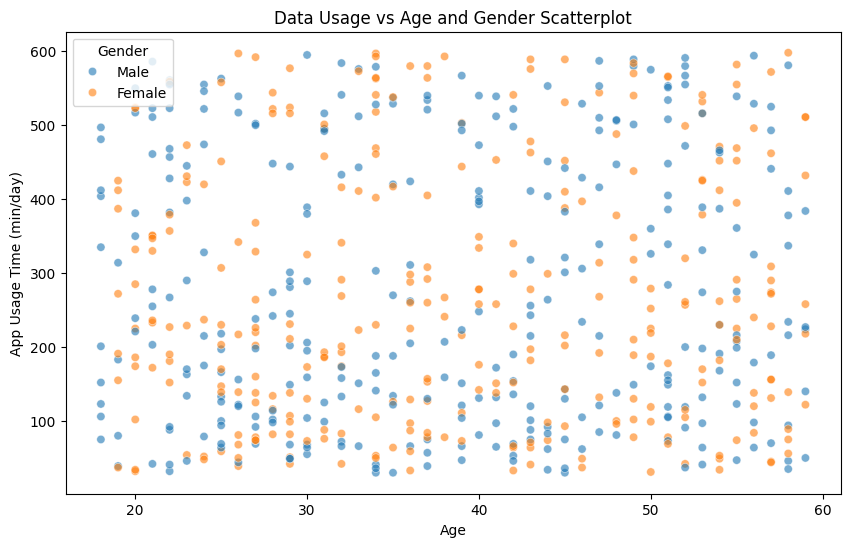

In [104]:
matplotlib.pyplot.figure(figsize=(10, 6))
seaborn.scatterplot(data=data, x='Age', y='App Usage Time (min/day)',hue='Gender',  alpha=0.6)
matplotlib.pyplot.title('Data Usage vs Age and Gender Scatterplot')
matplotlib.pyplot.show()

**Conclusion** -
**1. **

#### **4. Impact on Battery Drainage due to different conditions**

##### **Device Model vs Battery Drainage**

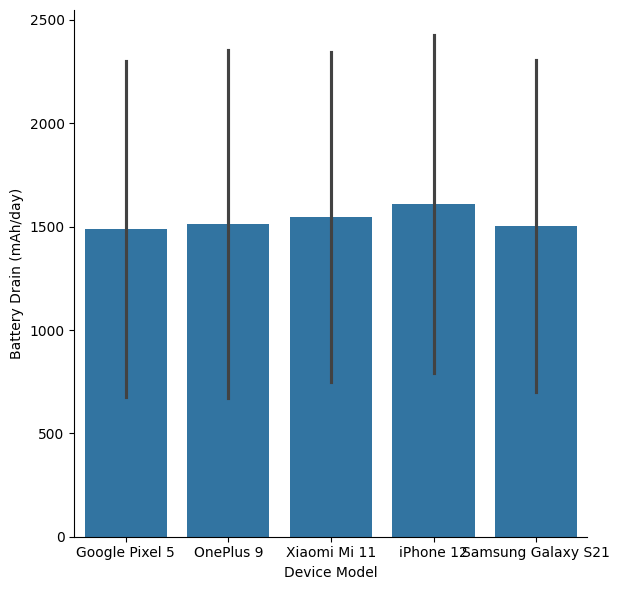

In [105]:
g=seaborn.catplot(data=data, kind="bar", x="Device Model", y="Battery Drain (mAh/day)", errorbar="sd", height=6)
g.set_axis_labels("Device Model", "Battery Drain (mAh/day)")

**Conclusion -** Battery Drainage is almost equal accross all device models, with iPhone 12 having a slight higher.

##### **Screen Time vs Battery Drainage**

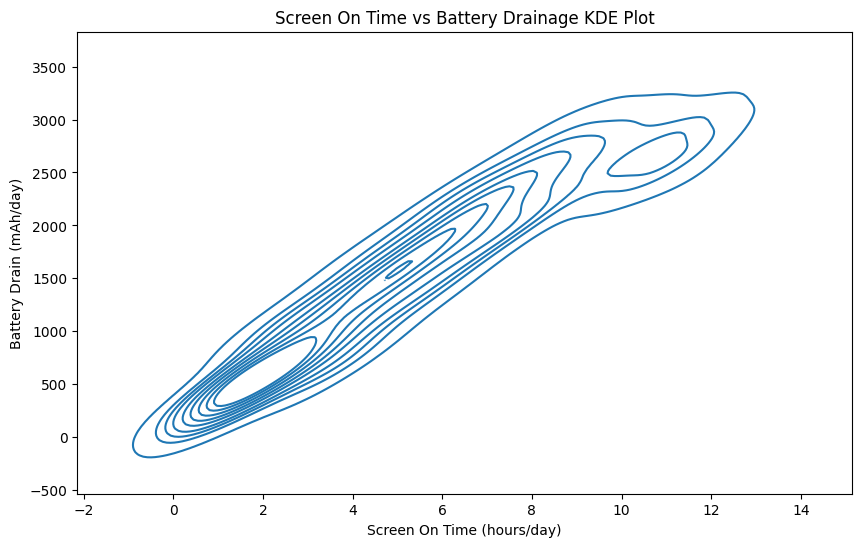

In [106]:
matplotlib.pyplot.figure(figsize=(10, 6))
seaborn.kdeplot(data=data, x='Screen On Time (hours/day)', y='Battery Drain (mAh/day)')
matplotlib.pyplot.title('Screen On Time vs Battery Drainage KDE Plot')
matplotlib.pyplot.show()

**Conclusion -** Battery Drainage is directly proportional to Screen Time i.e. higher the screen time, more battery is consumed.

##### **Data Usage vs Battery Drainage**

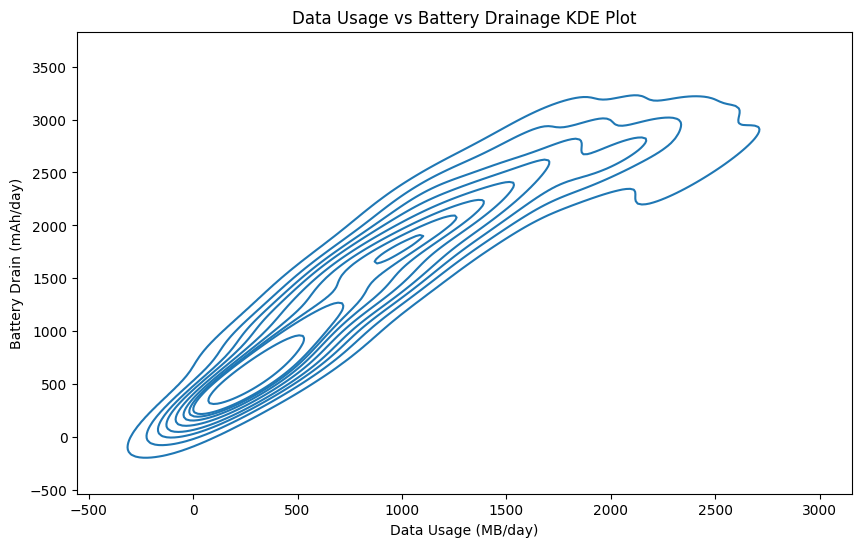

In [107]:
matplotlib.pyplot.figure(figsize=(10, 6))
seaborn.kdeplot(data=data, x='Data Usage (MB/day)', y='Battery Drain (mAh/day)')
matplotlib.pyplot.title('Data Usage vs Battery Drainage KDE Plot')
matplotlib.pyplot.show()

**Conclusion -** Battery Drainage is directly proportional to Data Usage i.e. higher the data usage, more battery is consumed.

##### **App Usage vs Battery Drainage**

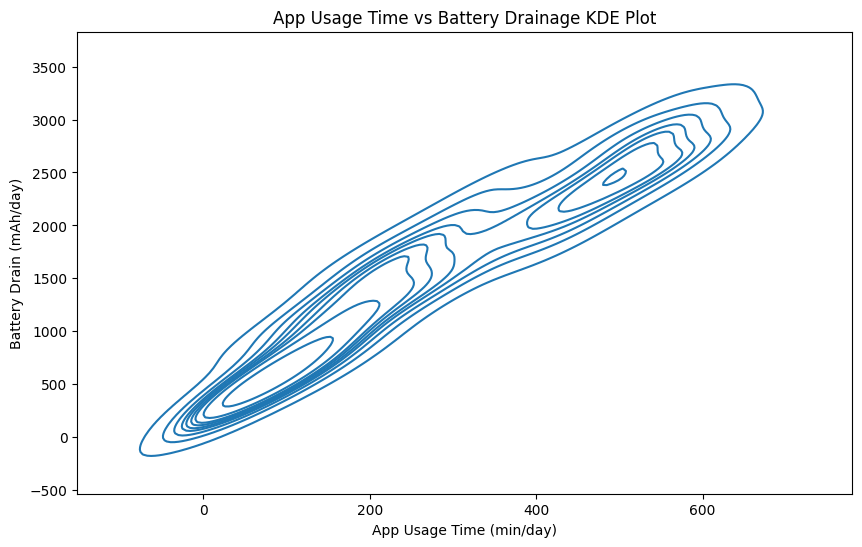

In [108]:
matplotlib.pyplot.figure(figsize=(10, 6))
seaborn.kdeplot(data=data, x='App Usage Time (min/day)', y='Battery Drain (mAh/day)')
matplotlib.pyplot.title('App Usage Time vs Battery Drainage KDE Plot')
matplotlib.pyplot.show()

**Conclusion -** Battery Drainage is directly proportional to App Usage Time i.e. higher the app usage time, more battery is consumed.

#### **5. Correlation between Behaviour Class with other categories**

##### **With Data Usage**

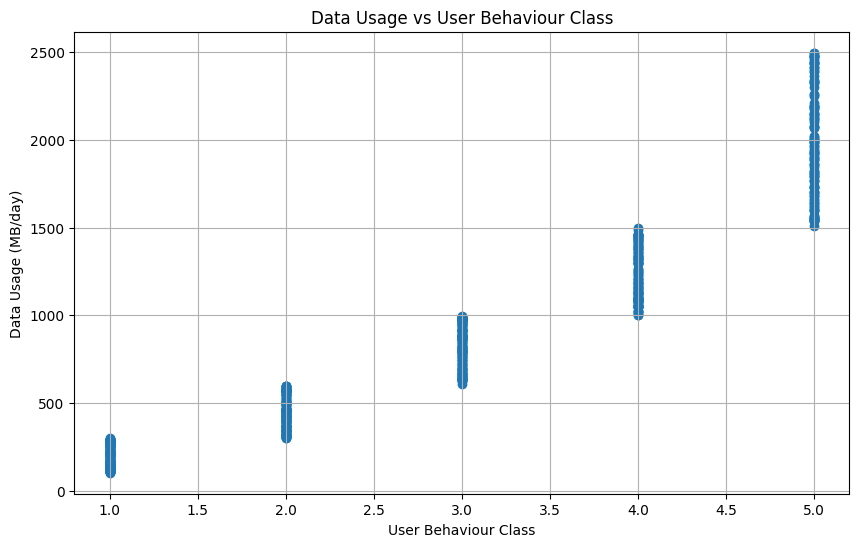

In [134]:
matplotlib.pyplot.figure(figsize=(10, 6))
matplotlib.pyplot.scatter(data=data, x="User Behavior Class", y="Data Usage (MB/day)")
matplotlib.pyplot.title('Data Usage vs User Behaviour Class')
matplotlib.pyplot.xlabel("User Behaviour Class")
matplotlib.pyplot.ylabel("Data Usage (MB/day)")
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

**Conclusions -** from the above depiction of user behaviour class with data usage, we can conclude that each user is assigned a class according to the following parameters: -<br>
1. User Behaviour Class 1 - Data Usage < 300
2. User Behaviour Class 2 - 300 < Data Usage < 600
3. User Behaviour Class 3 - 600 < Data Usage < 1000
4. User Behaviour Class 4 - 1000 < Data Usage < 1500
5. User Behaviour Class 5 - Data Usage > 1500

##### **With Screen Time**

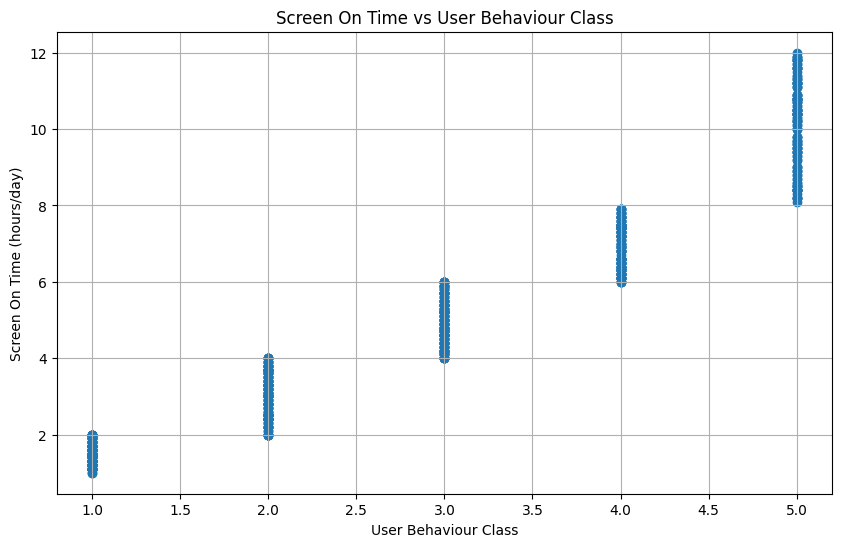

In [132]:
matplotlib.pyplot.figure(figsize=(10, 6))
matplotlib.pyplot.scatter(data=data, x="User Behavior Class", y="Screen On Time (hours/day)")
matplotlib.pyplot.title('Screen On Time vs User Behaviour Class')
matplotlib.pyplot.xlabel("User Behaviour Class")
matplotlib.pyplot.ylabel("Screen On Time (hours/day)")
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

**Conclusions -** from the above depiction of user behaviour class with screen time, we can conclude that each user is assigned a class according to the following parameters: -<br>
1. User Behaviour Class 1 - Screen on Time < 2
2. User Behaviour Class 2 - 2 < Screen on Time < 4
3. User Behaviour Class 3 - 4 < Screen on Time < 6
4. User Behaviour Class 4 - 6 < Screen on Time < 8
5. User Behaviour Class 5 - Screen on Time > 8

##### **With Battery Drainage**

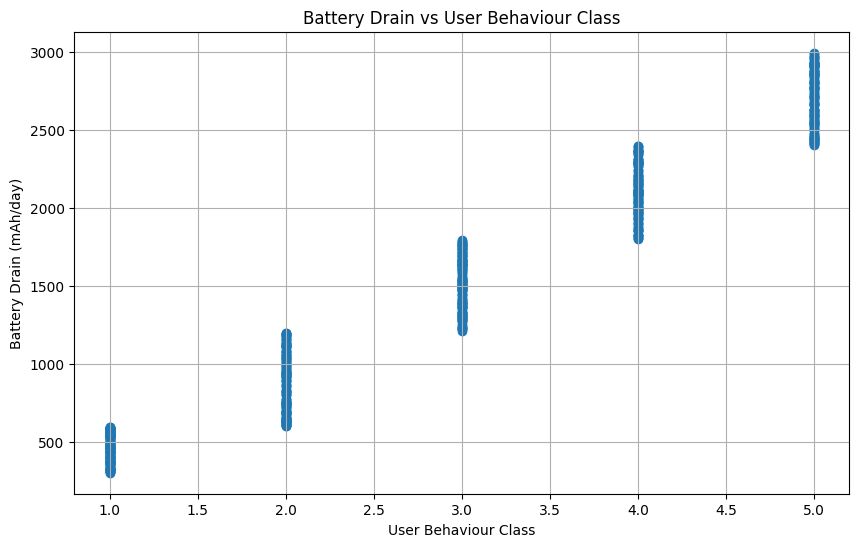

In [133]:
matplotlib.pyplot.figure(figsize=(10, 6))
matplotlib.pyplot.scatter(data=data, x="User Behavior Class", y="Battery Drain (mAh/day)")
matplotlib.pyplot.title('Battery Drain vs User Behaviour Class')
matplotlib.pyplot.xlabel("User Behaviour Class")
matplotlib.pyplot.ylabel("Battery Drain (mAh/day)")
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

## **5. Summary of Findings: -**